I work in the credit card industry. While I am not directly responsible for identifying fraudlent transactions, my job is impacted by fraud. Accoring to Nilson Report, there were $28.65 billion in credit card fraud losses in 2019 despite large efforts by credit card issuers to prevent fraudulent accounts and transactions. Being able to identify and reduce fraud can lead to a significant reduction in losses for card issuers and prevent customers from dealing with the hassel of cancelling their credit card and wait for a new one to be issued.  

The goal of this case study is to be able to use cardholder and transaction data to train a model(s) to predict which transactions are fraudulent and which are not. The model(s) will then be applied on test data to determine the accuracy of the model(s). Variables include information such as transaction amount, transaction location, merchant type, along with several cardholder characteristics like gender, age, and location. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#load data
df = pd.read_csv('fraudTrain.csv')

In [13]:
#display dimensions
print(df.shape)
df.head()

(1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [14]:
df.rename({'Unnamed: 0': 'transaction'}, axis=1, inplace=True)
df.head()

,transaction,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Questions that might help predict fraudulent transactions  <br>
a. What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?<br>
b. Does merchant or merchant category correlate with fraud?<br>
c. Are there high risk areas? Does distance (longitude/lattitude) from home to merchant matter?<br>
d. Do personal traits matter (gender, age, city, etc)?<br>
e. How does spend for each person impact fraud tolerances?<br>

In [5]:
# Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  
# Does this present any more questions for you?  
# Does it lead you to a conclusion yet?  

df.describe()

,transaction,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
#describe categorical data
df.describe(include=['O'])

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2020-06-02 12:47:07,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,864 Reynolds Plains,Birmingham,TX,Film/video editor,1977-03-23,8a34a22e013490d271920025a7c0f041
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [7]:
#find value totals for fraud variable
df.is_fraud.value_counts()

#less than 1% of transactions are fraud

0    1289169
1       7506
Name: is_fraud, dtype: int64

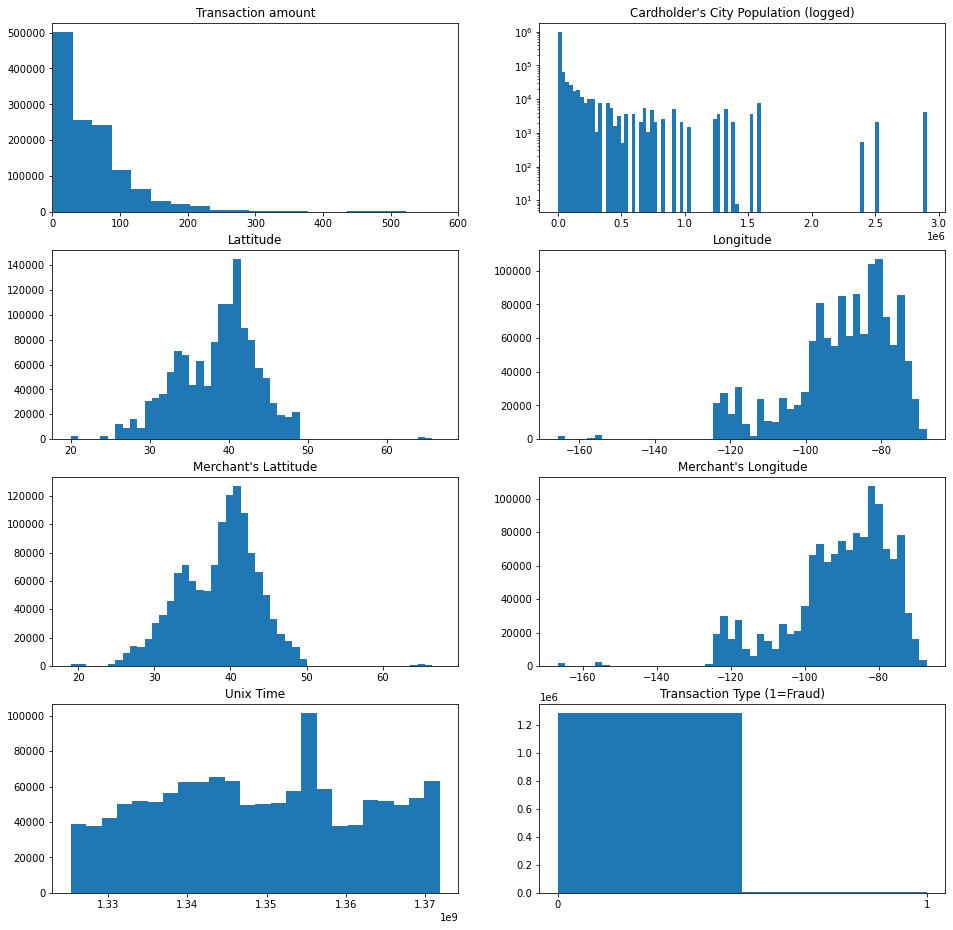

In [13]:
# Display histograms for numerical data

#create figure
fig = plt.figure(figsize=(16,16))

#add subplot for transaction amounts
ax1 = fig.add_subplot(421)
ax1.title.set_text('Transaction amount')
ax1.hist(df['amt'].dropna(), bins=1000)
ax1.set_xlim([0, 600])

#add subplot for city population
ax2 = fig.add_subplot(422)
ax2.title.set_text('Cardholder\'s City Population (logged)')
ax2.hist(df['city_pop'].dropna(), bins=100, log=True)

#add subplot for lattitude
ax3 = fig.add_subplot(423)
ax3.title.set_text('Lattitude')
ax3.hist(df['lat'].dropna(), bins=50)

#add subplot for longitue
ax4 = fig.add_subplot(424)
ax4.title.set_text('Longitude')
ax4.hist(df['long'].dropna(), bins=50)

#add subplot for lattitude
ax5 = fig.add_subplot(425)
ax5.title.set_text('Merchant\'s Lattitude')
ax5.hist(df['merch_lat'].dropna(), bins=50)

#add subplot for longitue
ax6 = fig.add_subplot(426)
ax6.title.set_text('Merchant\'s Longitude')
ax6.hist(df['merch_long'].dropna(), bins=50)

#add subplot for transaction amounts
ax7 = fig.add_subplot(427)
ax7.title.set_text('Unix Time')
ax7.hist(df['unix_time'].dropna(), bins=24)

#add subplot for transaction amounts
ax8 = fig.add_subplot(428)
ax8.title.set_text('Transaction Type (1=Fraud)')
ax8.hist(df['is_fraud'].dropna(), bins=2)
ax8.set_xticks([0,1]) 

#display plots
plt.show()

Observations: <br>
a. Transactions skew to relatively low values. Are fraud transcations similar? <br>
b. Merchant locations appear to be similar to cardholder locations. <br>

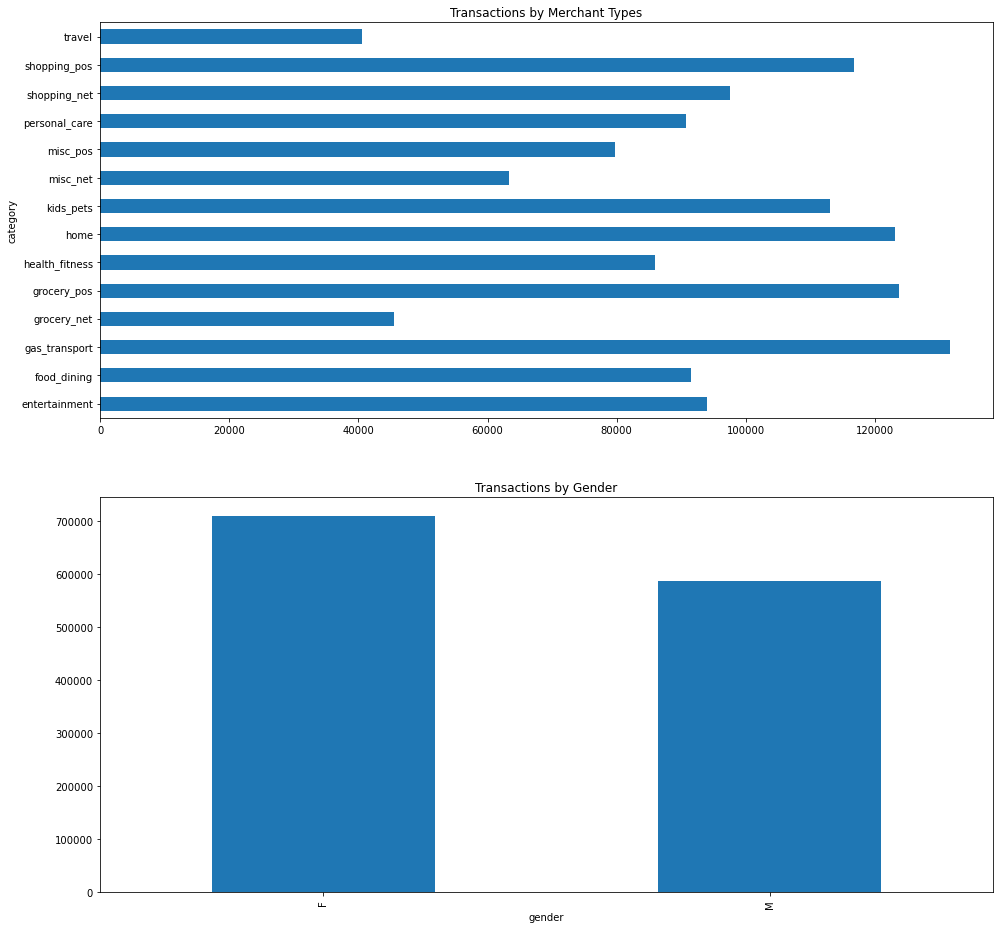

In [14]:
#create figure
fig = plt.figure(figsize=(16,16))
plt.subplot(2,1,1)

#add subplot for transaction by merchant types
df.groupby('category')['transaction'].count().plot(kind='barh')
plt.title("Transactions by Merchant Types") 

#add subplot for transaction by gender
plt.subplot(2,1,2)
df.groupby('gender')['transaction'].count().plot(kind='bar')
plt.title("Transactions by Gender") 


plt.show()


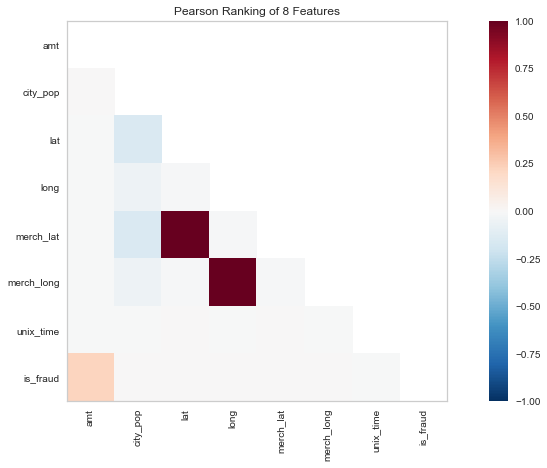

In [19]:
#  Checking correlations
  
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

num_features = ['amt', 'city_pop', 'lat', 'long','merch_lat', 'merch_long', 'unix_time', 'is_fraud']

# extract the numpy arrays from the data frame
X = df[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show() # Draw/show/poof the data
plt.show()


Observations: <br>
a. The biggest correlations are between location, which makes sense. <br>
b. Population and location have negative correlations (although these variables are more ordinal). <br>
c. Fraud and transaction amount are slightly correlated (although the fraud variable is more categorical here) <br>

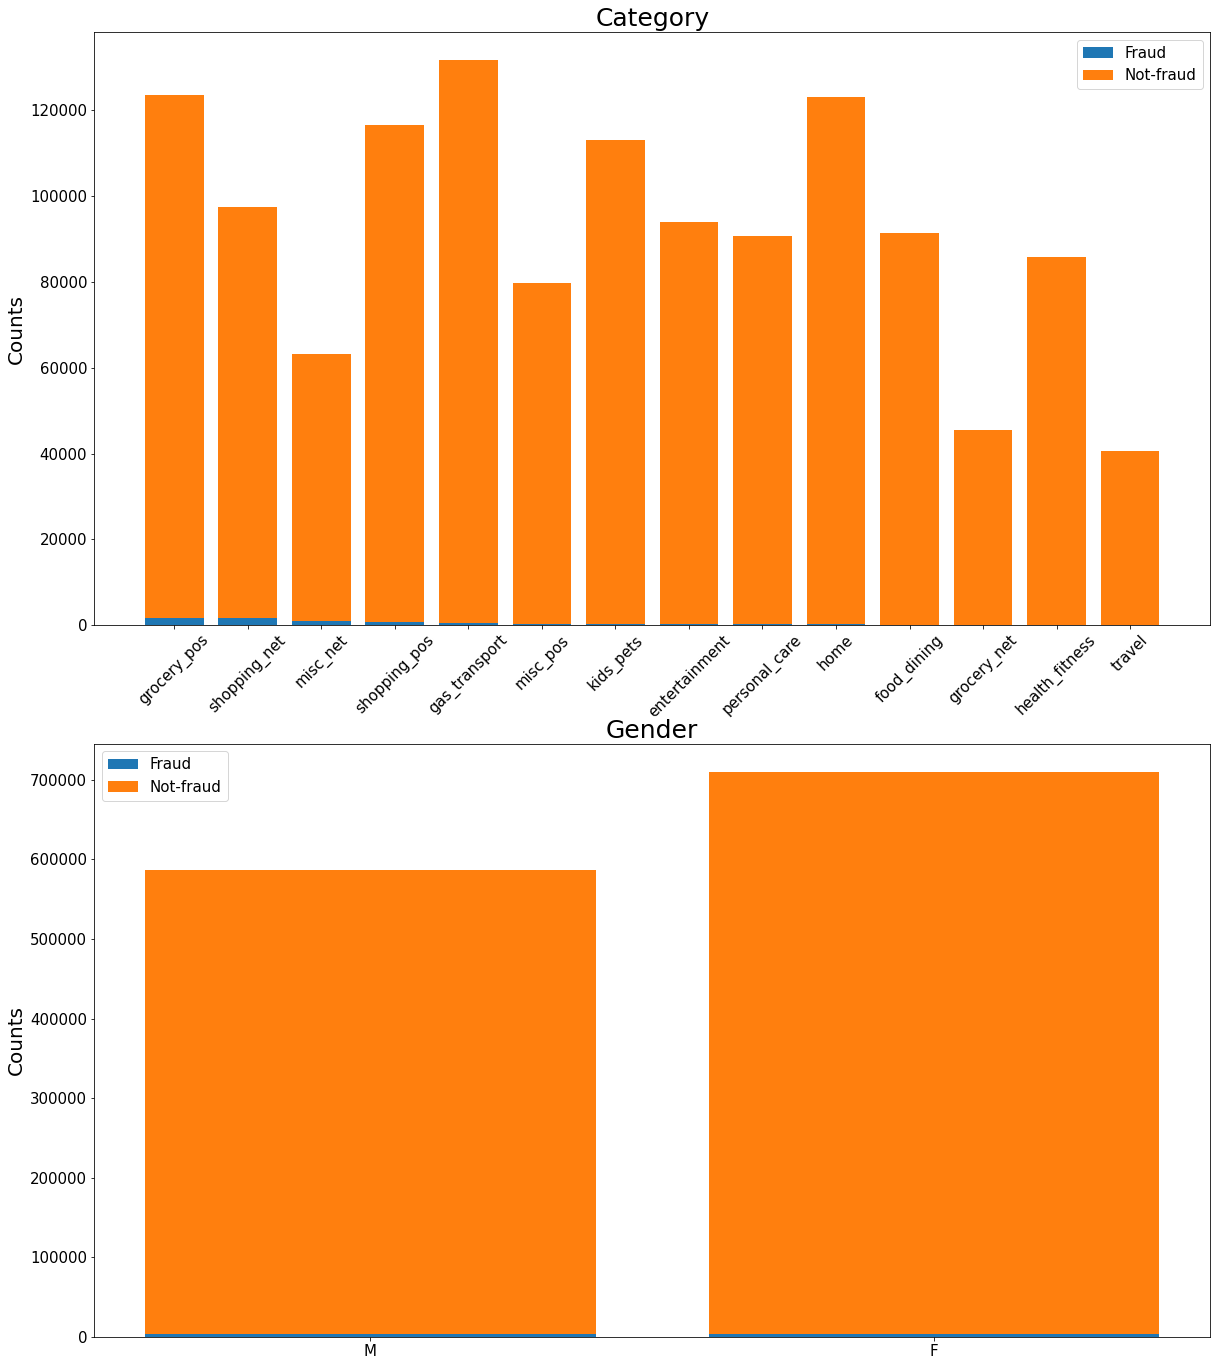

In [8]:
#  Stack Bar Charts to compare fraud in merchant categories and gender

#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 24)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 1)

# feed category data into the visulizer
category_fraud = df.replace({'is_fraud': {1: 'Fraud', 0: 'Not-fraud'}})[df['is_fraud']==1]['category'].value_counts()
category_nofraud = df.replace({'is_fraud': {1: 'Fraud', 0: 'Not-fraud'}})[df['is_fraud']==0]['category'].value_counts()
category_nofraud = category_nofraud.reindex(index = category_fraud.index)

# make the bar plot
p1 = axes[0].bar(category_fraud.index, category_fraud.values)
p2 = axes[0].bar(category_nofraud.index, category_nofraud.values, bottom=category_fraud.values)
axes[0].set_title('Category', fontsize=25)
axes[0].set_xticklabels(category_fraud.index, rotation = 45)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].legend((p1[0], p2[0]), ('Fraud', 'Not-fraud'), fontsize = 15)

# feed gender data into the visulizer
gender_fraud = df.replace({'is_fraud': {1: 'Fraud', 0: 'Not-fraud'}})[df['is_fraud']==1]['gender'].value_counts()
gender_nofraud = df.replace({'is_fraud': {1: 'Fraud', 0: 'Not-fraud'}})[df['is_fraud']==0]['gender'].value_counts()
gender_nofraud = gender_nofraud.reindex(index = gender_fraud.index)

# make the bar plot
p1 = axes[1].bar(gender_fraud.index, gender_fraud.values)
p2 = axes[1].bar(gender_nofraud.index, gender_nofraud.values, bottom=gender_fraud.values)
axes[1].set_title('Gender', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p1[0], p2[0]), ('Fraud', 'Not-fraud'), fontsize = 15)




Observations: <br>
a. Because of relatively low fraud volume, it is difficult to tell but it seems a couple cateogies may be disproportionate.

Part 2

In [15]:
#Convert transaction amount to logged amount
#convert dob to age
#Features that don't provide much insight that can be dropped going forward:
#first, last, street, job, dob, unix_time, merchant

from datetime import date
from datetime import datetime
from geopy.distance import geodesic

# log-transformation
def log_transformation(df):
    return df.apply(np.log1p)

#convert transaction amount to log amount
df['amt_log'] = log_transformation(df['amt'])

#add number of transactions
df['transactions'] = df.groupby(df['cc_num'])['trans_num'].transform('count')

#calculate age from date of birth (dob)
def calculate_age(dob):
    today = date.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

#convert transaction from string to datetime
df['trans_date_trans_time'] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in df['trans_date_trans_time']]

#convert dob from string to datetime
df['dob'] = [datetime.strptime(dob, '%Y-%m-%d') for dob in df.dob]

#calculate age from date of birth
df['age'] = [calculate_age(dob) for dob in df.dob]

#calculate distance between cardholder home and merchant location
def distancer(row):
    coords_1 = (row['lat'], row['long'])
    coords_2 = (row['merch_lat'], row['merch_long'])
    return geodesic(coords_1, coords_2).miles
df['distance'] = df.apply(distancer, axis=1)


#drop unneeded features
df = df.drop(['transaction','merchant','first', 'last','street','job','dob','unix_time','lat','long'], axis=1)

#move is fraud to last column
df2 = df[[ col for col in df.columns if col != 'is_fraud'] + ['is_fraud']]

# check the data
print(df2.describe())
df2.head()

             cc_num           amt           zip      city_pop     merch_lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  8.882444e+04  3.853734e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  3.019564e+05  5.109788e+00   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.300000e+01  1.902779e+01   
25%    1.800429e+14  9.650000e+00  2.623700e+04  7.430000e+02  3.473357e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  2.456000e+03  3.936568e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  2.032800e+04  4.195716e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  2.906700e+06  6.751027e+01   

         merch_long       amt_log  transactions           age      distance  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022646e+01  3.533470e+00  1.818725e+03  4.691162e+01  4.729410e+01   
std    1.377109e+01  1.289448e+00  7.425057e+02  1.

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,city_pop,trans_num,merch_lat,merch_long,amt_log,transactions,age,distance,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,28654,3495,0b242abb623afc578575680df30655b9,36.011293,-82.048315,1.786747,2028,32,48.947783,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,Orient,WA,99160,149,1f76529f8574734946361c461b024d99,49.159047,-118.186462,4.684259,3030,42,18.775736,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,Malad City,ID,83252,4154,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,5.398660,503,59,67.172035,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,Boulder,MT,59632,1939,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,3.828641,493,54,59.455974,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,Doe Hill,VA,24433,99,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,3.760269,2017,34,48.282030,0


In [9]:
#no missing values in data frame
df.isna().sum().sum()

0

Observations: <br>
a. log of transaction amount (log_amt) shows a much more readable graph with less skew than the original graph in part 1. <br>
b. Age provides much more interpretable data than date of birth. Data appears to have positive skew. <br>
c. There is no missing data that needs to be accoutned for or filled in.

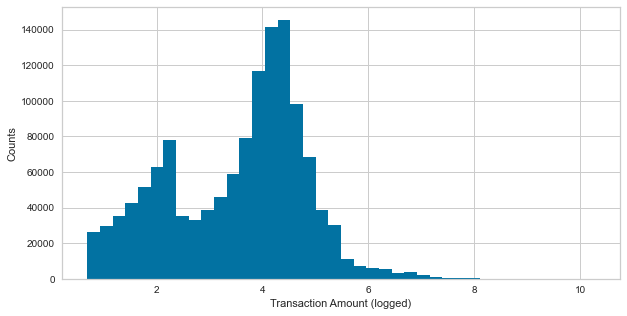

In [23]:
#plot new logged transaction amount
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df['amt_log'], bins=40)
plt.xlabel('Transaction Amount (logged)')
plt.ylabel('Counts')
plt.tick_params(axis='both')
plt.show()

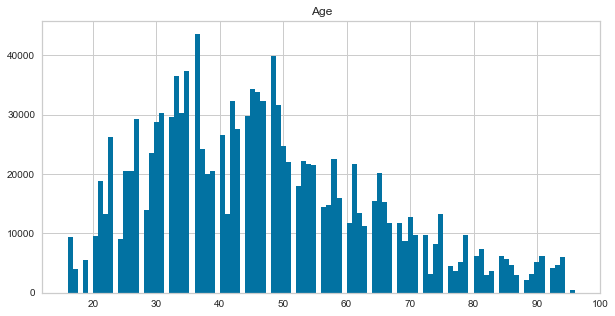

In [67]:
#plot new Age variable

#create figure
fig, ax = plt.subplots()

ax.hist(df['age'].dropna(), bins=100)
ax.title.set_text('Age')

In [16]:
# Convert categorical data into numbers
cat_features = ['category', 'gender', 'city','state']
data_cat = df2[cat_features]

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

# check the data
data_cat_dummies.head(10)

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


This creates too many features. Attempting to reduce features with Truncated SVD.

In [17]:
from sklearn.decomposition import TruncatedSVD

# Make sparse matrix
cat_features = ['city','state']
data_cat = df2[cat_features]
features_sparse = pd.get_dummies(data_cat)

# Create a TSVD
tsvd = TruncatedSVD(n_components=10)

# Conduct TSVD on sparse matrix
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

# Show results
print("Original number of features:", features_sparse.shape[1])
print("Reduced number of features:", features_sparse_tsvd.shape[1]) 

Original number of features: 945
Reduced number of features: 10


In [18]:
#create dataframe of new variables for concatenation
state_cat = pd.DataFrame(features_sparse_tsvd, columns = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10'])
state_cat.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,0.000071,6.022826e-05,-3.100505e-04,0.001339,-7.110417e-03,-0.019029,0.022722,0.007770,-0.056426,0.020891
1,0.000013,6.397204e-03,1.276805e-04,0.001251,-8.668752e-03,-0.001305,-0.000006,-0.006191,0.003598,0.018940
2,0.000754,-6.596841e-07,-9.391155e-08,0.000004,-4.822465e-07,0.000002,-0.000026,0.000025,0.000035,0.000007
3,0.000004,-1.627944e-05,-1.916476e-06,0.000004,4.326826e-04,0.000263,-0.000387,0.000124,0.000251,-0.000744
4,-0.000018,-1.306344e-04,5.854622e-04,-0.000117,1.134485e-02,0.012082,-0.024202,0.006321,0.057043,-0.012463


In [47]:
#numeric features
features_model = ['amt', 'city_pop','age', 'distance','merch_lat','merch_long','transactions','is_fraud']

# One Hot Encoding 
cat_features = ['category', 'gender']
data_cat = df2[cat_features]
data_cat_dummies = pd.get_dummies(data_cat)

#concatenate dataframes
final_df = pd.concat([df2[features_model], data_cat_dummies, state_cat], axis=1)
#move is fraud to last column
final_df = final_df[[ col for col in final_df.columns if col != 'is_fraud'] + ['is_fraud']]
final_df.head()

,amt,city_pop,age,distance,merch_lat,merch_long,transactions,category_entertainment,category_food_dining,category_gas_transport,...,v2,v3,v4,v5,v6,v7,v8,v9,v10,is_fraud
0,4.97,3495,32,48.947783,36.011293,-82.048315,2028,0,0,0,...,6.022826e-05,-3.100505e-04,0.001339,-7.110417e-03,-0.019029,0.022722,0.007770,-0.056426,0.020891,0
1,107.23,149,42,18.775736,49.159047,-118.186462,3030,0,0,0,...,6.397204e-03,1.276805e-04,0.001251,-8.668752e-03,-0.001305,-0.000006,-0.006191,0.003598,0.018940,0
2,220.11,4154,59,67.172035,43.150704,-112.154481,503,1,0,0,...,-6.596841e-07,-9.391155e-08,0.000004,-4.822465e-07,0.000002,-0.000026,0.000025,0.000035,0.000007,0
3,45.00,1939,54,59.455974,47.034331,-112.561071,493,0,0,1,...,-1.627944e-05,-1.916476e-06,0.000004,4.326826e-04,0.000263,-0.000387,0.000124,0.000251,-0.000744,0
4,41.96,99,34,48.282030,38.674999,-78.632459,2017,0,0,0,...,-1.306344e-04,5.854622e-04,-0.000117,1.134485e-02,0.012082,-0.024202,0.006321,0.057043,-0.012463,0


Observations: 

a. Feature reduction hopefully allows us to see the impact of areas of the country without creating a large number of features.

Part 3

In [48]:
from sklearn.model_selection import train_test_split

#create training and test datasets
data_model_X = final_df.iloc[:,:-1]

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = final_df['is_fraud'].replace({'is_fraud': {1: 'Fraud', 0: 'No Fraud'}})

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of fraud and non-fraud transactions in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of fraud and non-fraud transactions in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  907672
No. of samples in validation set: 389003


No. of fraud and non-fraud transactions in the training set:
0    902352
1      5320
Name: is_fraud, dtype: int64


No. of fraud and non-fraud transactions in the validation set:
0    386817
1      2186
Name: is_fraud, dtype: int64


C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


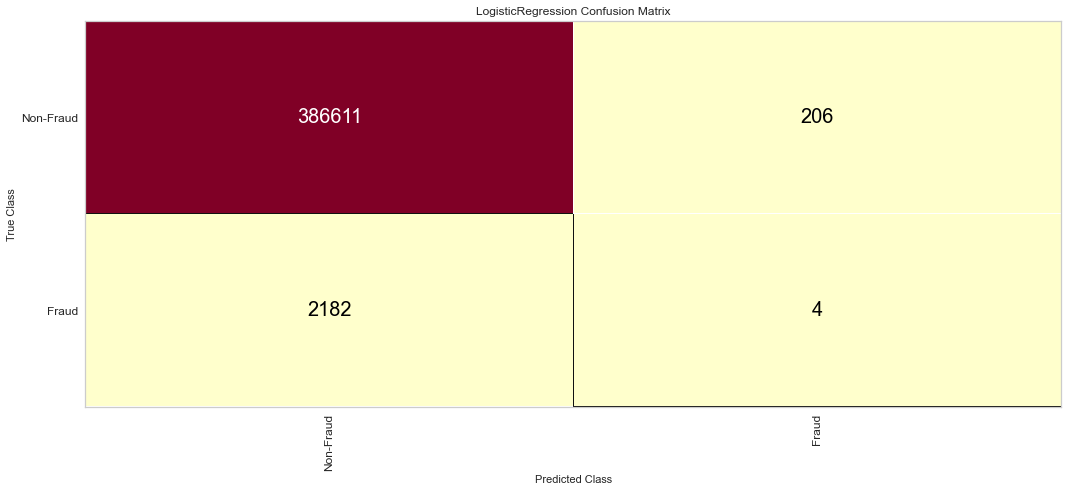

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


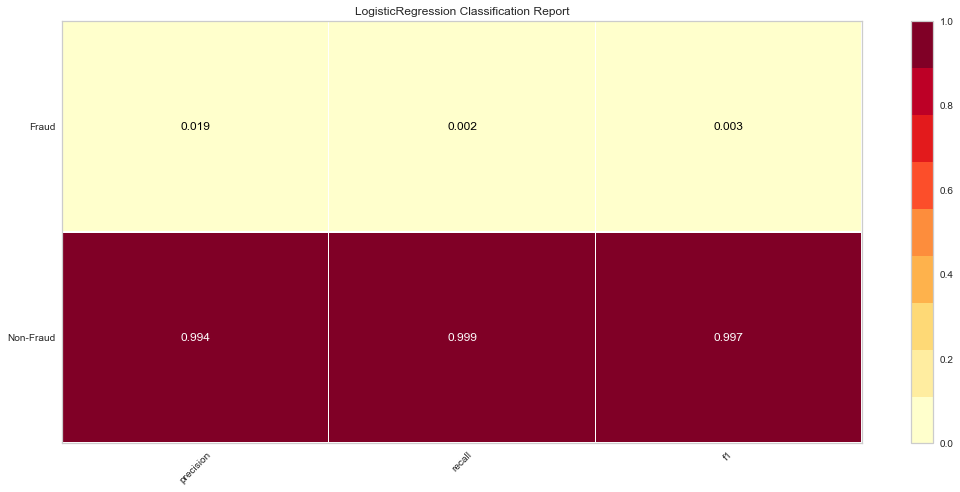

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


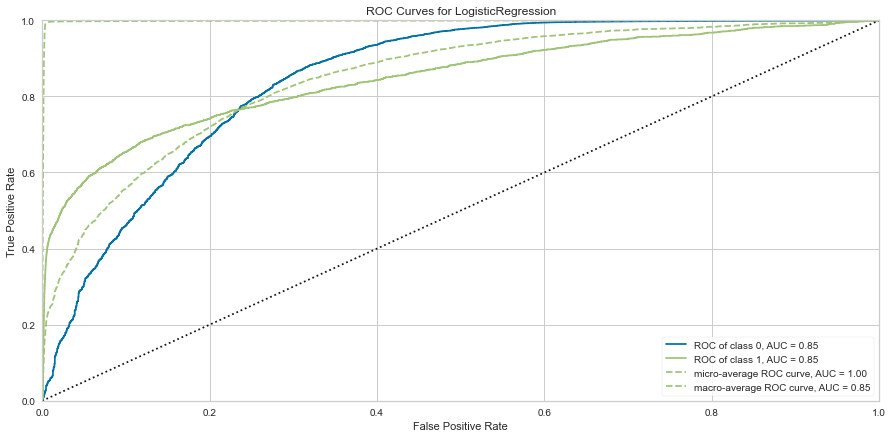

In [49]:
#Create and evaluate a logistic regression model

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
logistic_regression = LogisticRegression(random_state=0)
model = logistic_regression.fit(X_train, y_train)


#The ConfusionMatrix visualizer takes a model
classes = ['Non-Fraud','Fraud']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 12

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model, classes=[0,1])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

Observations: <br>
a. Obviously this model did not perform well, as none of the Fraud transactions were predicted as Fraud and Several Non-Fraud transactions were inaccurately predicted as Fraud. <br>
b. I would have assumed the opposite to have happened due to overfitting of the model

In [50]:
import statsmodels.api as sm

print(model.coef_)

logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary())

[[ 2.77281494e-03  6.15539698e-08 -9.36898377e-03 -2.67620603e-03
  -1.75549742e-02  2.60999210e-02 -1.29195721e-03 -1.99195668e-04
  -2.43773296e-04 -2.03909276e-05 -5.80216811e-05  6.93106500e-04
  -2.16366181e-04 -3.32049632e-04 -2.55666257e-04  3.41410631e-04
  -1.71581811e-04 -1.56758534e-04  5.66273999e-04 -1.05050571e-04
  -3.17766903e-04 -9.23250151e-05 -3.83505317e-04  3.58420787e-05
  -1.05297053e-04 -9.82890787e-05  7.40610467e-05 -3.98661953e-05
  -5.66684091e-05 -6.75252302e-05 -5.98540504e-05 -3.47587828e-05
  -9.76966046e-06]]
Optimization terminated successfully.
         Current function value: 0.028663
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               907672
Model:                          Logit   Df Residuals:                   907640
Method:                           MLE   Df Model:                           31
Date:                Sat, 06 Mar 

In [51]:
#Create and evaluate a decision tree

from sklearn.tree import DecisionTreeClassifier

# features = final_df.iloc[:,:-1]
# target = final_df.iloc[:,-1:]

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=10,
                                      min_samples_leaf=10,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=10,
                                      min_impurity_decrease=0)

# Train model
model = decisiontree.fit(X_train, y_train)


C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


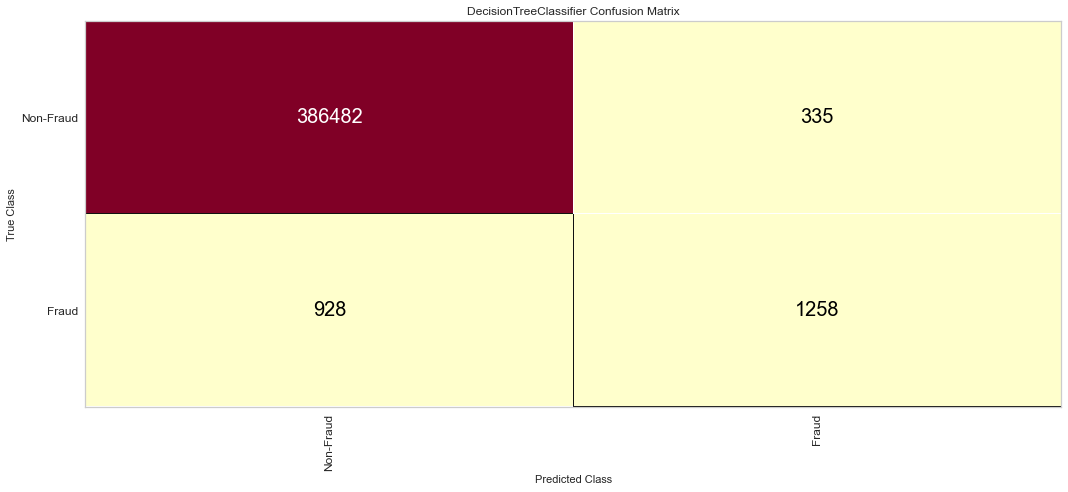

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


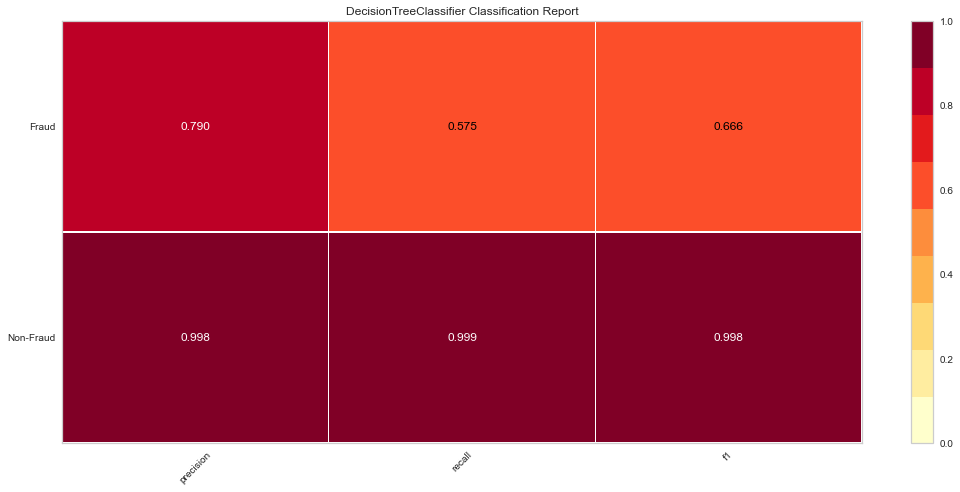

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


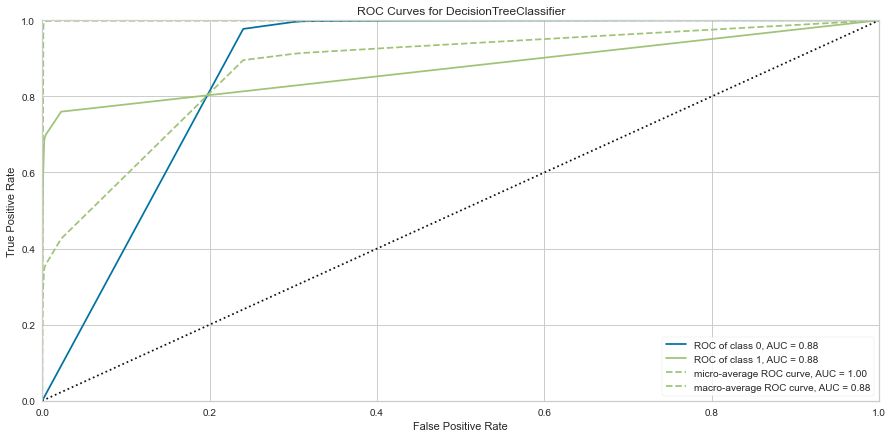

In [52]:
#The ConfusionMatrix visualizer takes a model
classes = ['Non-Fraud','Fraud']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 12

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model, classes=[0,1])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

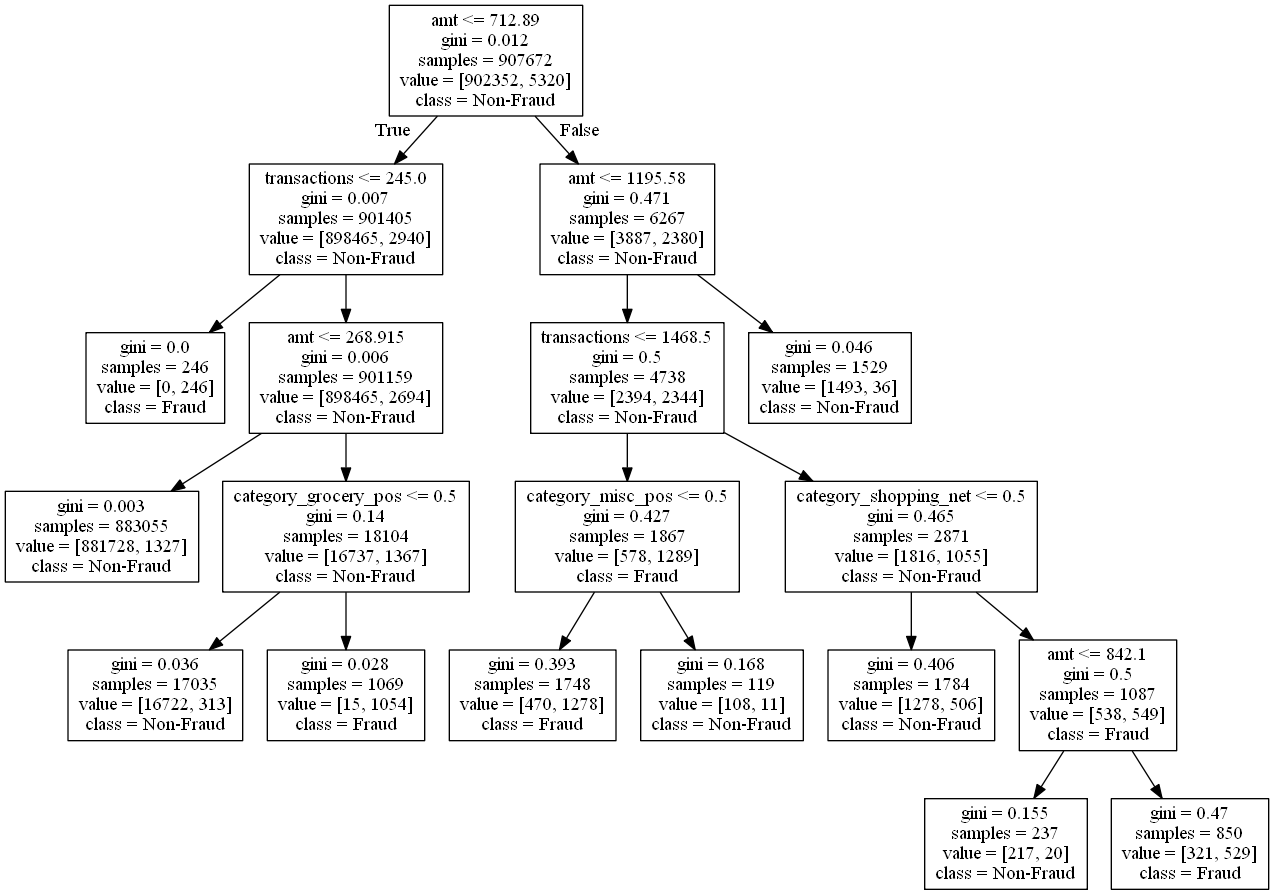

In [53]:
#visualize tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree


decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=10,
                                      min_samples_leaf=10,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=10,
                                      min_impurity_decrease=0)

# Train model
# features = final_df.iloc[:,:-1]
# target = final_df.iloc[:,-1:]
model = decisiontree.fit(X_train, y_train)


# Vizualize Tree
features = ['amt', 'city_pop', 'age', 'distance', 'merch_lat','merch_long', 'transactions','category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net','category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos','category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M','v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10']
classes = ['Non-Fraud','Fraud']

#Create dot data
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=features,
                                class_names=classes)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


Observations: <br>
a. While still not great, the decision tree does much better at predicting Fraud, although it inaccurately predicts Fraud on more Non-Fraud transactions than the logistic classifier.<br>
b. With enough depth and leaves, we can probably have our decision tree be perfect. For my final submission, I will work on optimizing the hyperparameters to be realistic, but perform well.

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


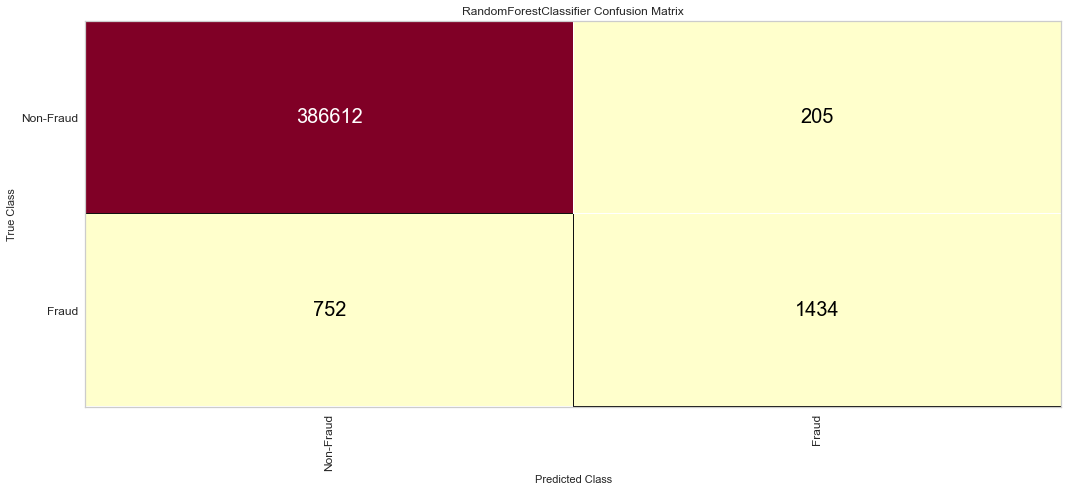

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


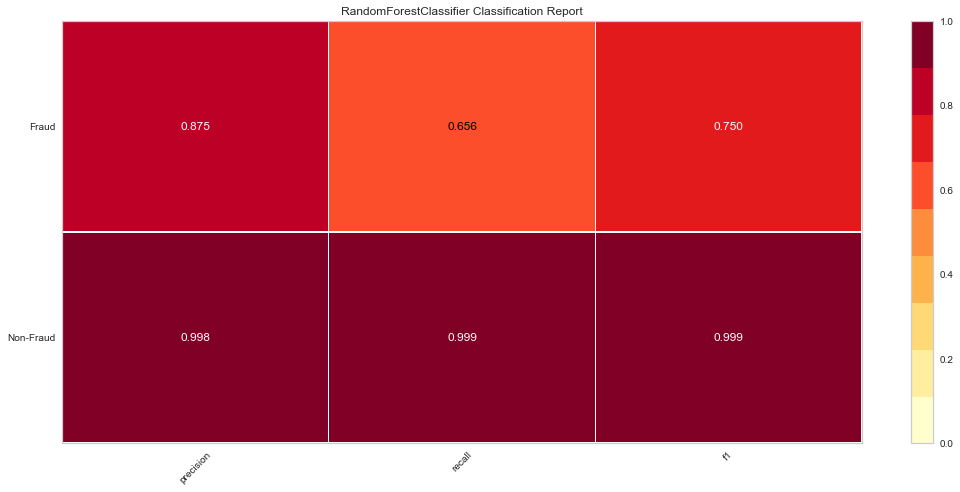

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


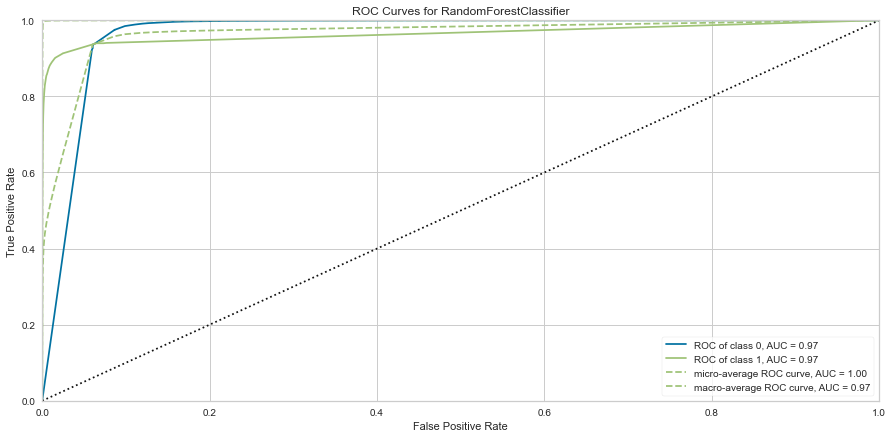

In [54]:
#Random Forest

# Load libraries
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(X_train, y_train) 


#The ConfusionMatrix visualizer takes a model
classes = ['Non-Fraud','Fraud']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 12

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model, classes=[0,1])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

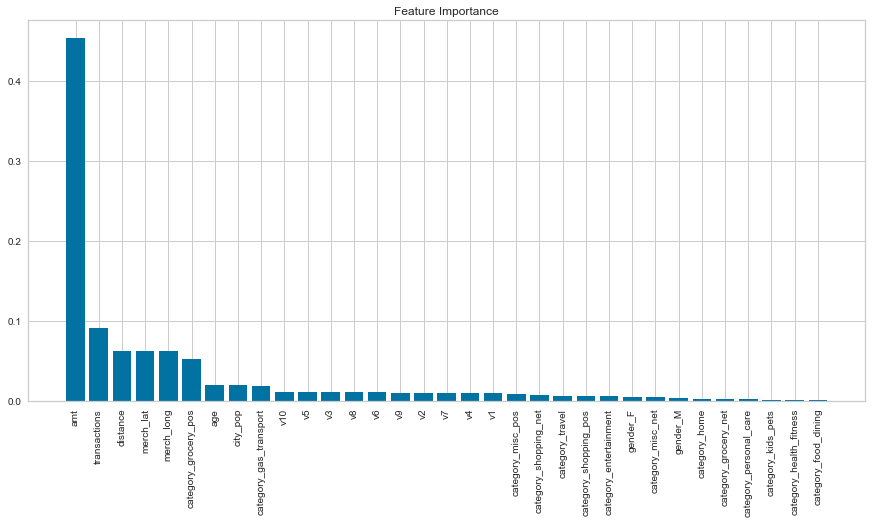

In [65]:
#Identify important features 


features=X_train
target=y_train

# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels

plt.xticks(range(features.shape[1]), names, rotation=90)

# Show plot
plt.show()


Observations: <br>
a. The random forest performed better than the logistic regression and decision tree models in every metric.<br>
b. ROC curves look pretty good.<br>
c. I would like to get the false negatives down even further. <br>

While the overall accuracy is high due to the large number of Non-Fraud transactions, my best model, the Random Forest, only accurately predicts 67% of Fraud transactions. I would like to see this number be higher without adding any more false positives. I may also play around with the weighting of the sampling since the Non-Fraud transactions greatly outweigh Fraud transactions.

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


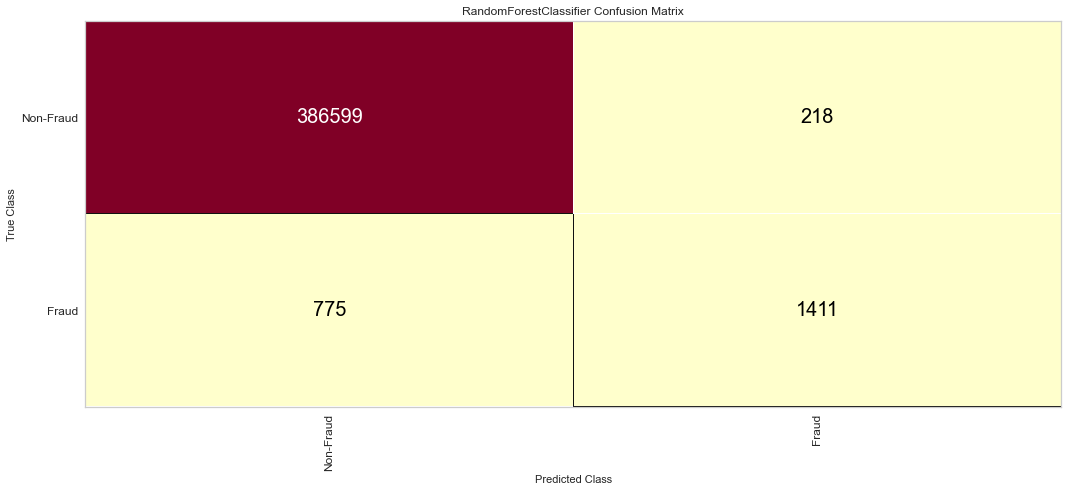

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


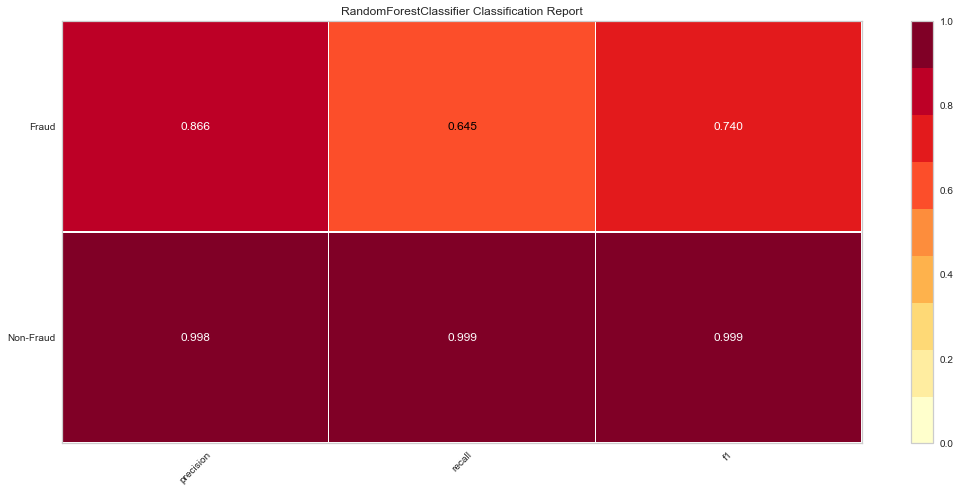

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


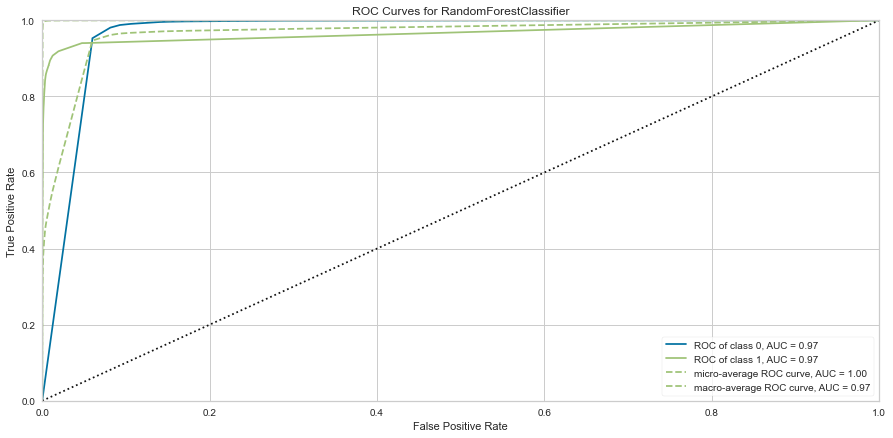

In [66]:
#Random Forest with weighting

# Load libraries
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')

# Train model
model = randomforest.fit(X_train, y_train) 


#The ConfusionMatrix visualizer takes a model
classes = ['Non-Fraud','Fraud']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 12

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model, classes=[0,1])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

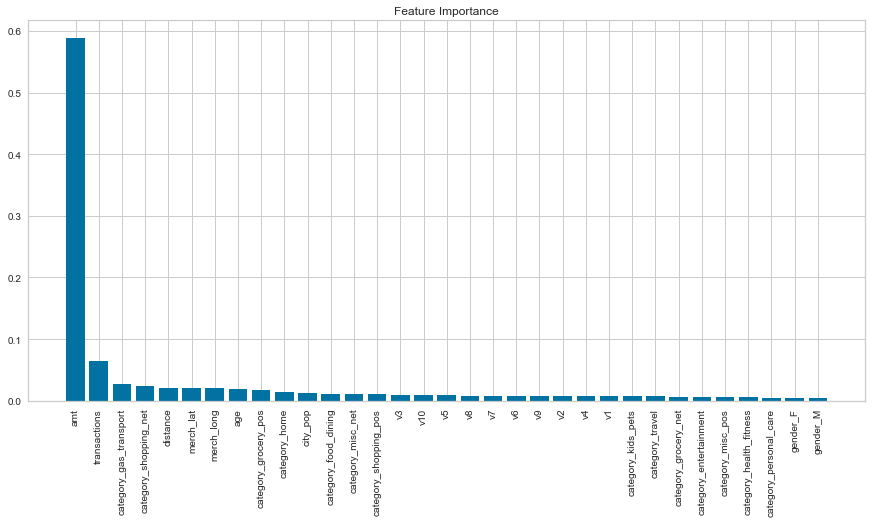

In [67]:
#Identify important features 

features=X_train
target=y_train

# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels

plt.xticks(range(features.shape[1]), names, rotation=90)

# Show plot
plt.show()

Scratch Work

In [41]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df2 = final_df.copy()

# Create features and target
num_features = ['amt', 'amt_log', 'city_pop','age', 'distance','merch_lat','merch_long','is_fraud']
features = df2[num_features].to_numpy()
# features = df2.iloc[:,1:-1]
# target = df2.iloc[:,-1:].to_numpy()
target = np.array(df2['is_fraud'].tolist())


# Create and run an LDA, then use it to transform the features
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

# Print the number of features
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_lda.shape[1])  
features_lda

Original number of features: 8
Reduced number of features: 1


array([[-0.56283704],
       [ 0.25772485],
       [ 1.0664068 ],
       ...,
       [ 0.28783603],
       [ 0.03952804],
       [-0.61031481]])

In [42]:
LDA = pd.DataFrame(features_lda, columns = ['LDA'])
LDA

,LDA
0,-0.562837
1,0.257725
2,1.066407
3,-0.115205
4,-0.207575
...,...
1296670,-0.347208
1296671,-0.107297
1296672,0.287836
1296673,0.039528


In [44]:
final_df2 = pd.concat([final_df, LDA], axis=1)

#move is fraud to last column
final_df2 = final_df2[[ col for col in final_df2.columns if col != 'is_fraud'] + ['is_fraud']]
final_df2.head()

,amt,amt_log,city_pop,age,distance,merch_lat,merch_long,category_entertainment,category_food_dining,category_gas_transport,...,v3,v4,v5,v6,v7,v8,v9,v10,LDA,is_fraud
0,4.97,1.786747,3495,32,48.947783,36.011293,-82.048315,0,0,0,...,-3.000139e-05,-0.003236,-0.005744,-0.008155,0.003817,0.006732,-0.003595,0.004620,-0.562837,0
1,107.23,4.684259,149,42,18.775736,49.159047,-118.186462,0,0,0,...,1.384031e-04,0.001424,0.000618,0.009305,-0.014019,-0.015219,-0.008430,-0.003560,0.257725,0
2,220.11,5.398660,4154,59,67.172035,43.150704,-112.154481,1,0,0,...,-8.664934e-08,-0.000003,-0.000002,-0.000007,0.000004,0.000024,-0.000015,-0.000022,1.066407,0
3,45.00,3.828641,1939,54,59.455974,47.034331,-112.561071,0,0,1,...,5.304368e-06,-0.000037,0.000389,0.000340,-0.000118,0.000030,0.000135,-0.000977,-0.115205,0
4,41.96,3.760269,99,34,48.282030,38.674999,-78.632459,0,0,0,...,-1.672960e-04,-0.005325,-0.029363,0.004909,0.003705,-0.008403,-0.065751,0.003343,-0.207575,0


In [45]:
final_df2.drop(['amt', 'amt_log', 'city_pop','age', 'distance','merch_lat','merch_long','is_fraud'], axis=1)
final_df2.head()

,amt,amt_log,city_pop,age,distance,merch_lat,merch_long,category_entertainment,category_food_dining,category_gas_transport,...,v3,v4,v5,v6,v7,v8,v9,v10,LDA,is_fraud
0,4.97,1.786747,3495,32,48.947783,36.011293,-82.048315,0,0,0,...,-3.000139e-05,-0.003236,-0.005744,-0.008155,0.003817,0.006732,-0.003595,0.004620,-0.562837,0
1,107.23,4.684259,149,42,18.775736,49.159047,-118.186462,0,0,0,...,1.384031e-04,0.001424,0.000618,0.009305,-0.014019,-0.015219,-0.008430,-0.003560,0.257725,0
2,220.11,5.398660,4154,59,67.172035,43.150704,-112.154481,1,0,0,...,-8.664934e-08,-0.000003,-0.000002,-0.000007,0.000004,0.000024,-0.000015,-0.000022,1.066407,0
3,45.00,3.828641,1939,54,59.455974,47.034331,-112.561071,0,0,1,...,5.304368e-06,-0.000037,0.000389,0.000340,-0.000118,0.000030,0.000135,-0.000977,-0.115205,0
4,41.96,3.760269,99,34,48.282030,38.674999,-78.632459,0,0,0,...,-1.672960e-04,-0.005325,-0.029363,0.004909,0.003705,-0.008403,-0.065751,0.003343,-0.207575,0


In [46]:

#create training and test datasets
data_model_X = final_df2.iloc[:,:-1]

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = final_df2['is_fraud'].replace({'is_fraud': {1: 'Fraud', 0: 'No Fraud'}})

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of fraud and non-fraud transactions in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of fraud and non-fraud transactions in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  907672
No. of samples in validation set: 389003


No. of fraud and non-fraud transactions in the training set:
0    902352
1      5320
Name: is_fraud, dtype: int64


No. of fraud and non-fraud transactions in the validation set:
0    386817
1      2186
Name: is_fraud, dtype: int64


C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


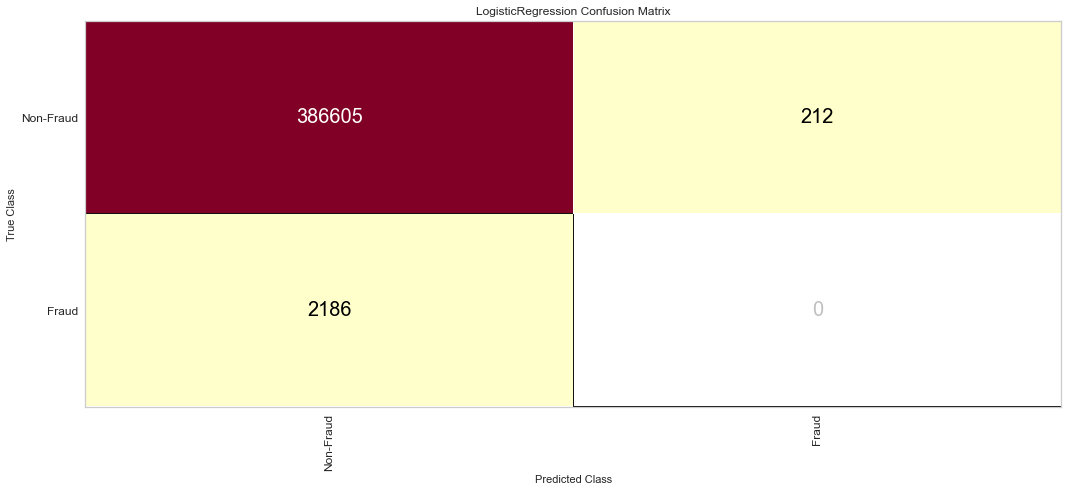

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


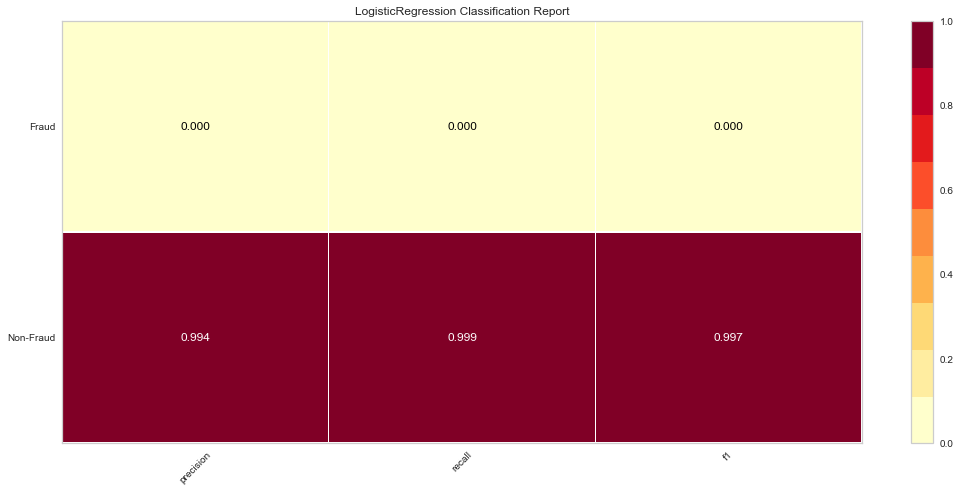

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


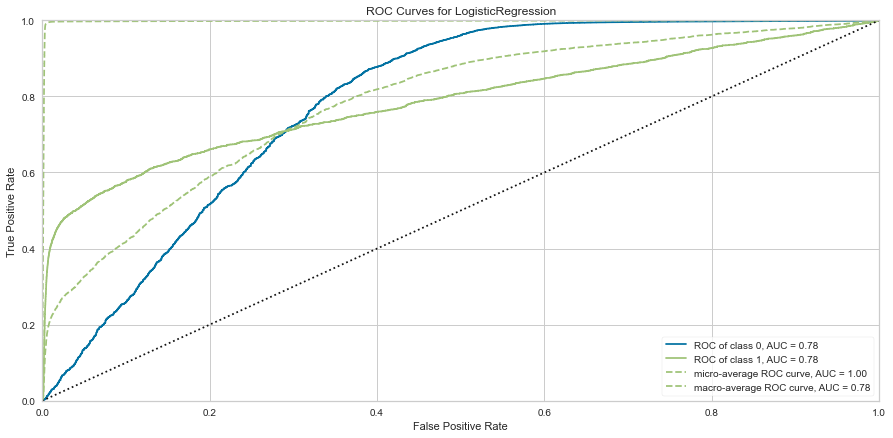

In [47]:
#Create and evaluate a logistic regression model

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
logistic_regression = LogisticRegression(random_state=0)
model = logistic_regression.fit(X_train, y_train)


#The ConfusionMatrix visualizer takes a model
classes = ['Non-Fraud','Fraud']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 12

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model, classes=[0,1])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [48]:
#Create and evaluate a decision tree

# features = final_df.iloc[:,:-1]
# target = final_df.iloc[:,-1:]

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=10,
                                      min_samples_leaf=10,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=10,
                                      min_impurity_decrease=0)

# Train model
model = decisiontree.fit(X_train, y_train)


C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


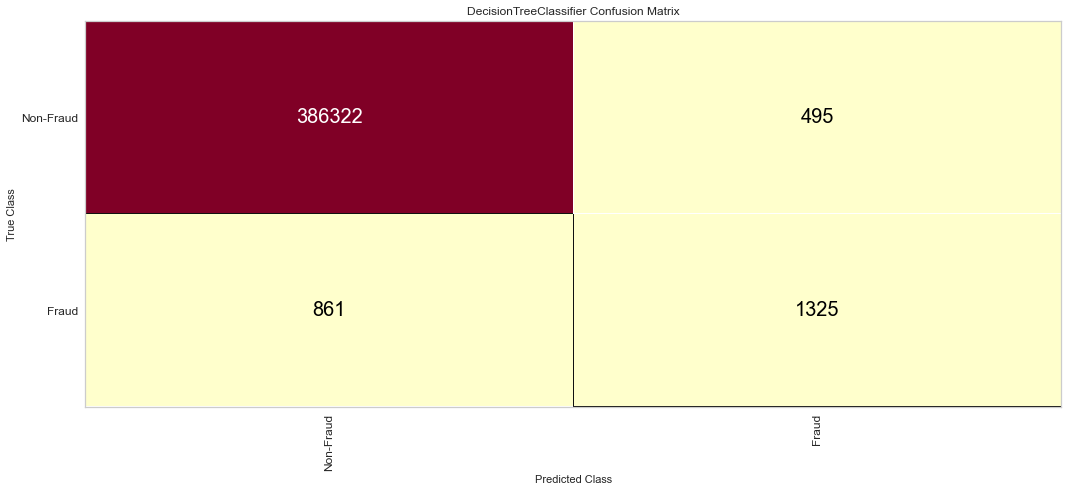

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


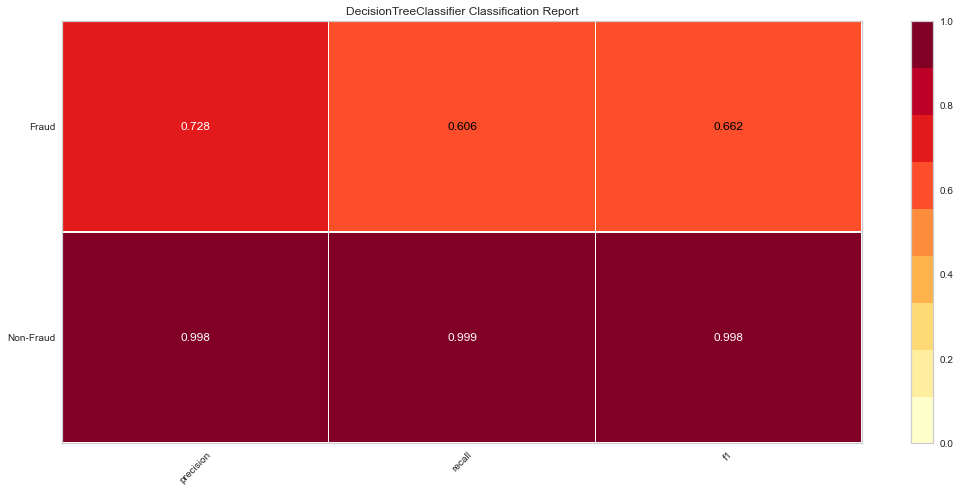

C:\Users\loosm\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


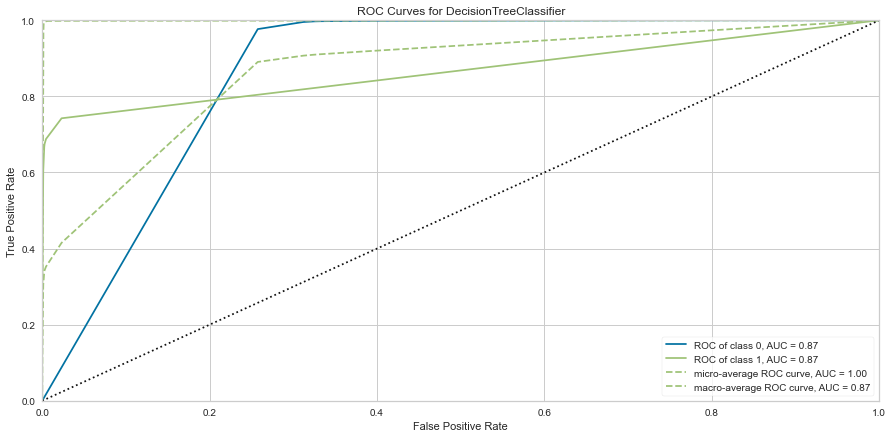

In [49]:
#The ConfusionMatrix visualizer takes a model
classes = ['Non-Fraud','Fraud']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 12

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model, classes=[0,1])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

LDA very slightly improved metrics for decision tree.